In [1479]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1480]:
data_train = pd.read_csv("/content/train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1481]:
data_test = pd.read_csv("/content/test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1482]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1483]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Feature Engineering

In [1484]:
data_train.corr()

<ipython-input-1484-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1485]:
data_train.fillna(0 , inplace=True)


In [1486]:
data_train = data_train.drop(["Cabin" ,"Ticket" ,'Name','PassengerId',"Embarked"] , axis=1)
data_test = data_test.drop(["Cabin" ,"Ticket" ,'Name','PassengerId',"Embarked"] , axis=1)

In [1487]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [1488]:
data_train["Survived"] = data_train["Survived"].fillna(0)

In [1489]:
data_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
5,3,male,14.0,0,0,9.2250
6,3,female,30.0,0,0,7.6292
7,2,male,26.0,1,1,29.0000
8,3,female,18.0,0,0,7.2292
9,3,male,21.0,2,0,24.1500


In [1490]:
data_train = data_train.replace("male" , 1)
data_train = data_train.replace("female" , 0)
data_test = data_test.replace("male" , 1)
data_test = data_test.replace("female" , 0)
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,0.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [1491]:
data_train["Age"] = data_train["Age"].astype("int")

<Axes: xlabel='Fare'>

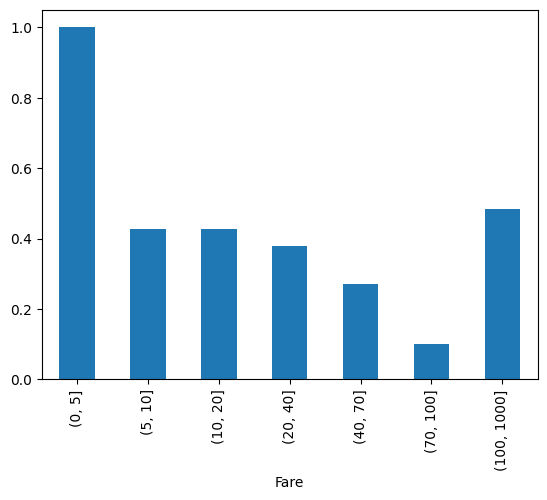

In [1492]:
data_train['Survived'].groupby(pd.cut(data_test['Fare'], [0,5,10,20,40,70,100,1000])).mean().plot(kind='bar')

<Axes: xlabel='Pclass'>

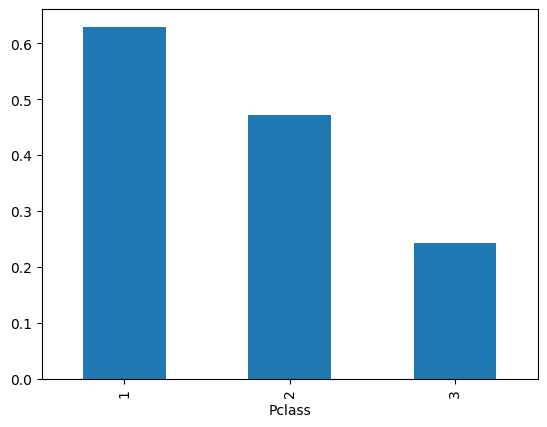

In [1493]:
data_train['Survived'].groupby(data_train['Pclass']).mean().plot(kind='bar')

<Axes: xlabel='Parch'>

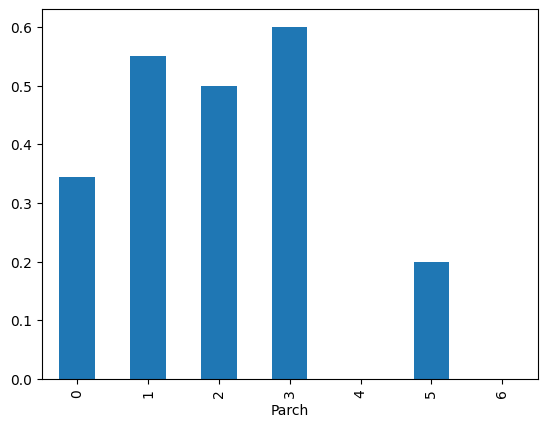

In [1494]:
data_train['Survived'].groupby(data_train['Parch']).mean().plot(kind='bar')

<Axes: xlabel='SibSp'>

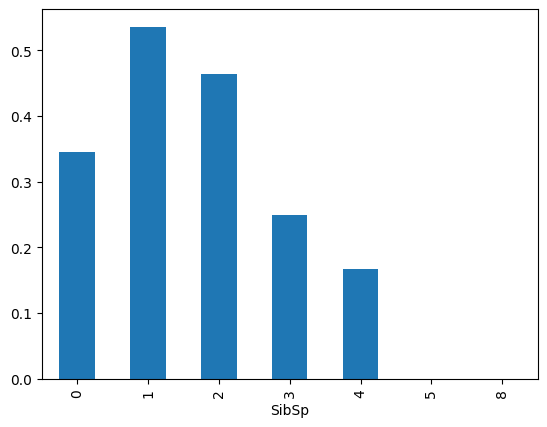

In [1495]:
data_train['Survived'].groupby(data_train['SibSp']).mean().plot(kind='bar')

In [1496]:
y_train = data_train[['Survived']].to_numpy()
x_train = data_train.drop(['Survived'], axis=1).to_numpy()

x_test = data_test.to_numpy()
y_test = pd.read_csv("/content/gender_submission.csv")
y_test = y_test[["Survived"]].to_numpy()



In [1497]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((891, 6), (891, 1), (418, 6), (418, 1))

In [1498]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train , y_train)).batch(10).shuffle(buffer_size=100)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test , y_test)).batch(10)

In [1499]:

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , Flatten , Dropout , BatchNormalization

In [1500]:

class MyModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.dense2 = Dense(512 , activation="relu")
    self.dense3 = Dense(256 , activation="relu")
    self.dense4 = Dense(128 , activation="relu")
    self.dense5 = Dense(64 , activation="relu")
    self.dense6 = Dense(32 , activation="relu")
    self.dense7 = Dense(16 , activation="relu")
    self.dense8 = Dense(8 , activation="relu")
    self.dense9 = Dense(16 , activation="relu")
    self.dense = Dense(2 , activation="softmax")
    self.dropout = Dropout(0.2)

  def call(self , x):
    #x = self.dense2(x)
    #x = self.dense3(x)
    #x = self.dense4(x)
    x = self.dense5(x)
    x = self.dense6(x)
    x = self.dense7(x)
    x = self.dense8(x)
    x = self.dense9(x)
    x = self.dense(x)
    return x

model = MyModel()

In [1501]:
# Main loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)


# Metrics
train_loss = tf.keras.metrics.Mean()
test_loss = tf.keras.metrics.Mean()

train_acc = tf.keras.metrics.SparseCategoricalAccuracy()
test_acc = tf.keras.metrics.SparseCategoricalAccuracy()



/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


epoch: 1 Train Loss: 0.6463050842285156 Train Acc: 0.6554433107376099 Test Acc: 0.6555023789405823
epoch: 2 Train Loss: 0.613582968711853 Train Acc: 0.6868686676025391 Test Acc: 0.660287082195282
epoch: 3 Train Loss: 0.6063653826713562 Train Acc: 0.6913580298423767 Test Acc: 0.6674641370773315
epoch: 4 Train Loss: 0.6031074523925781 Train Acc: 0.6992143392562866 Test Acc: 0.6578947305679321
epoch: 5 Train Loss: 0.6034412980079651 Train Acc: 0.6913580298423767 Test Acc: 0.6555023789405823
epoch: 6 Train Loss: 0.5992429852485657 Train Acc: 0.6902356743812561 Test Acc: 0.6578947305679321
epoch: 7 Train Loss: 0.5938439965248108 Train Acc: 0.6992143392562866 Test Acc: 0.6626794338226318
epoch: 8 Train Loss: 0.5911896824836731 Train Acc: 0.6980920433998108 Test Acc: 0.6650717854499817
epoch: 9 Train Loss: 0.5888731479644775 Train Acc: 0.6947250366210938 Test Acc: 0.660287082195282
epoch: 10 Train Loss: 0.5842248797416687 Train Acc: 0.6958473920822144 Test Acc: 0.660287082195282
epoch: 11 Tra

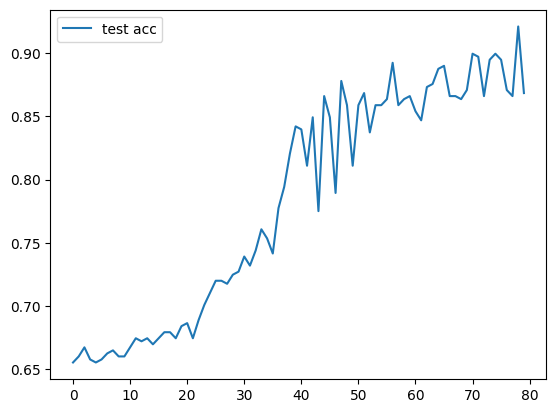

In [1502]:
@tf.function
def train(sample_data , label):
    with tf.GradientTape() as tape :
      prediction = model(sample_data)
      loss = loss_function(label , prediction)
    gradients = tape.gradient(loss , model.trainable_variables)
    optimizer.apply_gradients(grads_and_vars= zip(gradients , model.trainable_variables))

    train_loss(loss)
    train_acc(label , prediction)



@tf.function
def test(sample_data , label):
  prediction = model(sample_data)
  loss = loss_function(y_true=label , y_pred=prediction)
  test_loss(loss )
  test_acc(label , prediction)

temp = []
epochs = 100
for epoch in range(epochs):
  train_loss.reset_states()
  train_acc.reset_states()
  test_loss.reset_states()
  test_acc.reset_states()

  #train
  for data , label in train_dataset :
    train(data , label)

  # test
  for data , label in test_dataset :
    test(data , label)


  temp.append(test_acc.result())
  print("epoch:" , epoch + 1  ,
        f"Train Loss: {train_loss.result()}" ,
        f"Train Acc: {train_acc.result()}" ,
        #f"Test Loss: {test_loss.result()}" ,
        f"Test Acc: {test_acc.result()}"
        )

plt.plot(temp, label='test acc')
#plt.plot(str(train_acc), label='train_acc')
plt.legend()
plt.show()

In [1503]:
saved_model = model.save("titanic_model")

In [1504]:
model = tf.keras.models.load_model("titanic_model")

Rose_DeWitt_Bukater = [1, 0, 17, 1, 2, 100.0000]

pred_result = model.predict([Rose_DeWitt_Bukater])
print(np.argmax(pred_result))
print("survived probability : ",pred_result[0][1])


1/1 [==============================] - 0s 140ms/step
1
survived probability :  0.83182925
